In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
dataset = pd.read_csv("/content/penguins_lter.csv")
dataset.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.36390,-26.15531,NaN


In [66]:
dataset.drop(index=[3,339], inplace=True) 
dataset.reset_index(inplace=True, drop=True) 

In [69]:
X = dataset[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)',	'Body Mass (g)']]
y = dataset['Species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
clf = SVC(kernel = 'rbf', C=2.0).fit(X_train,y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)

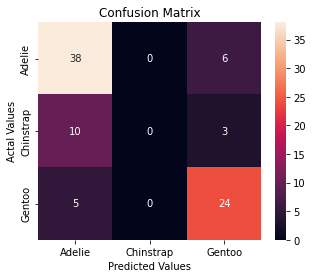

In [71]:
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Adelie','Chinstrap','Gentoo'], 
                     columns = ['Adelie','Chinstrap','Gentoo'])
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 73.86 %
